# Linear Independence

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
reload(ut)
print ''

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In the last lecture, we learned that $A{\bf x} = {\bf b}$ is consistent if and only if $\bf b$ lies in the span of the columns of $A.$

As an example, we saw for the following matrix $A$, $A{\bf x} = {\bf b}$ is not consistent for all ${\bf b}$:

$$A = \left[\begin{array}{rrr}1&3&4\\-4&2&-6\\-3&-2&-7\end{array}\right]$$

We realized that was because the span of $A$'s columns is not $\mathbb{R}^3$, but rather a plane lying within $\mathbb{R}^3$.   So, when $\bf b$ does not lie in that plane, then $A{\bf x} = {\bf b}$ is not consistent and has no solution.

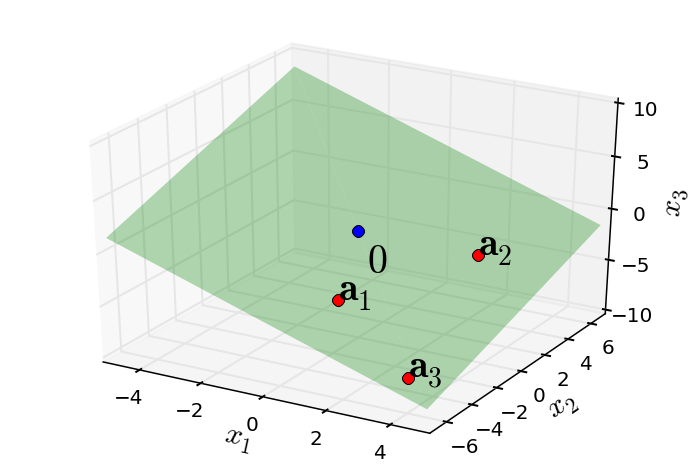

In [3]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
a1 = [1.0,-4.0,-3.0]
a2 = [3.0,2.0,-2.0]
a3 = [4.0, -6.0, -7]
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(a3[0],a3[1],a3[2],r'$\bf a_3$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,a3[0],a3[1],a3[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
#ax.set_title(r'$b_1 - \frac{1}{2}b_2 + b_3 = 0$',size=20)
# ax.mouse_init()
print ''

As a reminder, here is the picture of the span of the columns of $A$.

Clearly, $\bf 0, a_1, a_2,$ and $\bf a_3$ have a particular relationship, namely, they all lie within the same plane -- even though the vectors are in $\mathbb{R}^3$.  Today we will talk about how to define this relationship precisely for vectors of arbitrary dimension, that is, vectors in $\mathbb{R}^n$.

The relationship between these vectors will be called _linear dependence._

Before stating the definition, let's get a sense intuitively of what we want to capture.  We make this observation: the plane defined by ${\bf a_1, a_2, a_3}$ happens to include the origin.  That's one way of capturing the special relationship among ${\bf a_1, a_2, a_3}.$  

Here is the formal definition:

A set of vectors $\{{\bf v_1, ..., v_p}\}$ all of which are in $\mathbb{R}^n$ is said to be _linearly dependent_ if there exist weights $\{c_1, ..., c_p\},$ __not all zero,__ such that

$$c_1{\bf v_1} + ... + c_p{\bf v_p} = 0.$$

Conversely, the set $\{{\bf v_1, ..., v_p}\}$ is said is said to be _linearly independent_ if the vector equation

$$c_1{\bf v_1} + ... + c_p{\bf v_p} = 0.$$

has only the trivial solution $c_1 = 0, ..., c_p = 0$.

This is called a _linear dependence relation_ among $\{{\bf v_1, ..., v_p}\}$ when the weights are not all zero.  A set of vectors is linearly dependent if and only if it is not linearly independent.

## Example.

Let ${\bf v_1} = \left[\begin{array}{r}1\\2\\3\end{array}\right], {\bf v_2} = \left[\begin{array}{r}4\\5\\6\end{array}\right],$ and ${\bf v_3} = \left[\begin{array}{r}2\\1\\0\end{array}\right].$

Let's determine (a) if the set $\{{\bf v_1, v_2, v_3}\}$ is linearly independent, and (b) if not, a linear dependence relation among them.

(a). Are $\{{\bf v_1, v_2, v_3}\}$ linearly independent?

We must determine if there is a nontrivial solution of the vector equation:
$$x_1{\bf v_1} + x_2{\bf v_2} + x_3{\bf v_3} = 0.$$

Let's row reduce the augmented matrix:

$$\left[\begin{array}{rrrc}1&4&2&0\\2&5&1&0\\3&6&0&0\end{array}\right] \sim 
\left[\begin{array}{rrrc}1&4&2&0\\0&-3&-3&0\\0&0&0&0\end{array}\right].$$

We can see that $x_1$ and $x_2$ are basic variables, and $x_3$ is free.  Each nonzero value of $x_3$ determines a nontrivial solution of the vector equation.  So $\{{\bf v_1, v_2, v_3}\}$ are linearly dependent.

(b). To find the linear dependence relation among ${\bf v_1, v_2,}$ and ${\bf v_3},$ we continue the row reduction to obtain the reduced echelon form:

$$\left[\begin{array}{rrrc}1&4&2&0\\2&5&1&0\\3&6&0&0\end{array}\right] \sim 
\left[\begin{array}{rrrc}1&4&2&0\\0&-3&-3&0\\0&0&0&0\end{array}\right] \sim
\left[\begin{array}{rrrc}1&0&-2&0\\0&1&1&0\\0&0&0&0\end{array}\right]$$

Which denotes the system of equations:

$$\begin{array}{rrrcl}x_1&&-2x_3&=&0\\&x_2&+x_3&=&0\\&&0&=&0\end{array}$$

So $x_1 = 2x_3, x_2 = -x_3,$ and $x_3$ is free.   

We can choose any nonzero value for $x_3$ -- say, $x_3 = 5$.  Then $x_1 = 10$ and $x_2 = -5$.  This gives us the solution:

$$ 10{\bf v_1} - 5{\bf v_2} + 5{\bf v_3} = {\bf 0}.$$

This is one (out of infinitely many) linear dependence relations among ${\bf v_1, v_2,}$ and ${\bf v_3}.$

## Linear Independence of Matrix Columns

The columns of a matrix are a set of vectors, so our definition of linear dependence extends naturally to them.  In particular if $A = [{\bf a_1}\;\dots\;{\bf a_n}]$ then

$$x_1{\bf a_1} + ... + x_n{\bf a_n} = 0$$

can be written as $A{\bf x} = {\bf 0}.$ 

So each linear dependence relation among the columns of $A$ corresponds to a nontrivial solution of $A{\bf x} = {\bf 0}.$

In other words, the columns of the matrix $A$ are linearly independent if and only if the equation $A{\bf x} = {\bf 0}$ has __only__ the trivial solution.

## Another Interpretation of Linear Dependence

Here is another way of thinking about linear dependence.

__Theorem.__  A set $S = \{{\bf v_1, ..., v_p}\}$ of two or more vectors is linearly dependent if and only if at least one of the vectors in $S$ is a linear combination of the others.

__Proof.__

First, let's consider the "if" part:

Assume ${\bf v_p} = c_1{\bf v_1} + \dots + c_{p-1} {\bf v_{p-1}}.$  Then clearly 

$$c_1{\bf v_1} + \dots + c_{p-1} {\bf v_{p-1}} - {\bf v_p} = 0,$$

and not all the coefficients are zero (the coefficient of ${\bf v_p}$ is $-1$).  Thus, the vectors are linearly dependent.

Now, we consider the "only if" part:

Assume $S$ is linearly dependent.  Then $c_1{\bf v_1} + \dots + c_p{\bf v_p} = 0$ and at least one of the $c_i$ is nonzero.  Pick one of the nonzero $c_i,$ and rearranging, we get:

$${\bf v_i} = -(c_1/c_i){\bf v_1} + \dots + -(c_p/c_i){\bf v_p}$$

Thus, there is at least one vector that is a linear combination of the others.

## Question Time! Q5.1

## Example.

Let us return to the motivation at the start of the lecture, and formalize the connection between spanning sets and linear dependence.

Let ${\bf u} = \left[\begin{array}{r}3\\1\\0\end{array}\right]$ and ${\bf v} = \left[\begin{array}{r}1\\6\\0\end{array}\right].$  Let's (a) describe the set spanned by ${\bf u}$ and ${\bf v}$ and (b) explain why a vector ${\bf w}$ is in Span$\{\bf u, v\}$ if and only if $\{\bf u, v, w\}$ is linearly dependent.

__Solution.__ The vectors ${\bf u}$ and ${\bf v}$ are linearly independent so they span a plane in $\mathbb{R}^3$.  In fact, since $x_3 = 0$ in both vectors, they span the $x_1x_2$ plane.

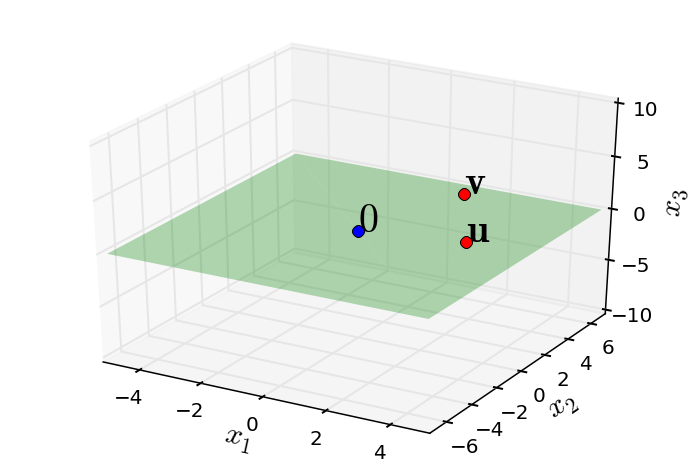

In [4]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
u = [3.0,1,0]
v = [1.0,6,0]
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0,0,0,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
#ax.set_title(r'$b_1 - \frac{1}{2}b_2 + b_3 = 0$',size=20)
# ax.mouse_init()
print ''

Now, if ${\bf w}$ is in Span$\{\bf u, v\}$, then ${\bf w}$ is a linear combination of ${\bf u}$ and ${\bf v}$. So then $\{\bf u, v, w\}$ is linearly dependent (by the Theorem we just proved).

And conversely, if $\{\bf u, v, w\}$ is linearly dependent, then there exist $c_1, c_2,$ and $c_3,$ not all zero, such that

$$ c_1 {\bf u} + c_2 {\bf v} + c_3 {\bf w} = {\bf 0}.$$

We can see that ${\bf u}$ and ${\bf v}$ are linearly independent, so the only way for $c_1 {\bf u} + c_2{\bf v}$ to be zero is if $c_1 = c_2 = 0$.  So $c_1 {\bf u} + c_2{\bf v}$ must be nonzero, and that means $c_3$ must be different from zero.  So

$$ {\bf w} = -(c_1/c_3) {\bf u} - (c_2/c_3) {\bf v},$$

that is, ${\bf w}$ is a linear combination of ${\bf u}$ and ${\bf v}$, and therefore lies in Span$\{\bf u, v\}$.

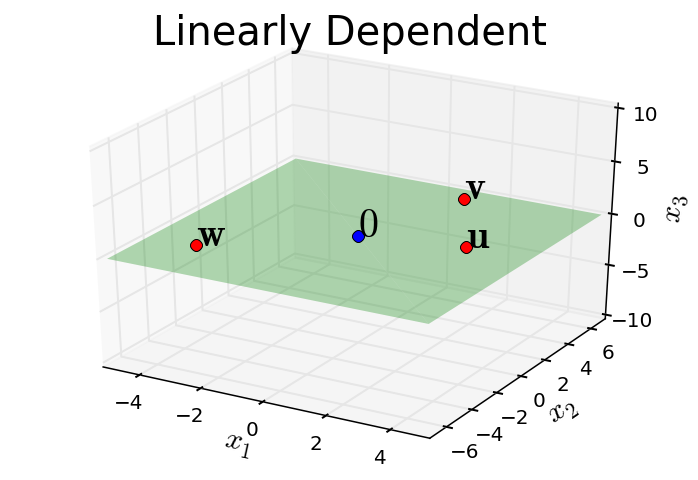

In [5]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
u = np.array([3.0,1,0])
v = np.array([1.0,6,0])
w = -1.0*u -0.5*v
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(w[0],w[1],w[2],r'$\bf w$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0,0,0,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,w[0],w[1],w[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'Linearly Dependent',size=20)
# ax.mouse_init()
print ''

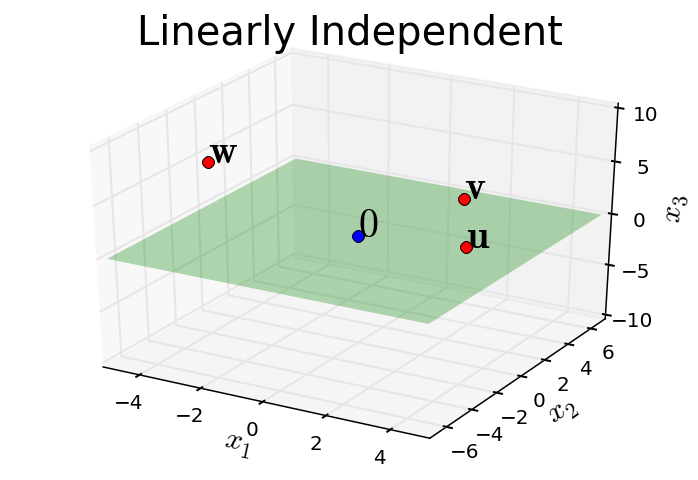

In [6]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
u = np.array([3.0,1,0])
v = np.array([1.0,6,0])
w = -1.0*u -0.5*v + np.array([0.5,0,8.0])
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(w[0],w[1],w[2],r'$\bf w$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0,0,0,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,w[0],w[1],w[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'Linearly Independent',size=20)
# ax.mouse_init()
print ''

## Linear Dependence in $\mathbb{R}^2$

Let's try to interpret linear dependence directly in terms of vector sums.

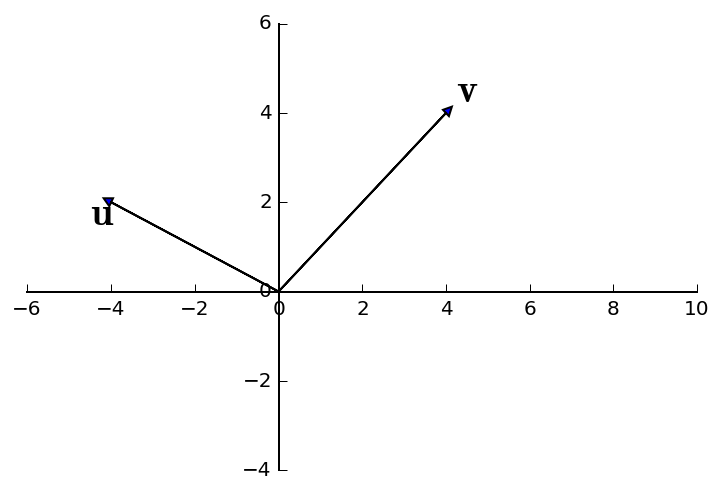

In [7]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6.0,10.0,-4.0,6.0)
ut.centerAxes(ax)
u = np.array([-4.0,2.0])
v = np.array([4.0,4.0])
w = np.array([8.0,1.0])
ax.arrow(0,0,u[0],u[1],head_width=0.2, head_length=0.2)
ax.arrow(0,0,v[0],v[1],head_width=0.2, head_length=0.2)
#ax.arrow(0,0,w[0],w[1],head_width=0.2, head_length=0.2)
ax.plot(0,-3,'')
ax.plot(7,0,'')
ax.plot(0,3,'')
ax.plot(-4,0,'')
ax.text(u[0]-0.5, u[1]-0.5, r'$\bf u$',size=20)
ax.text(v[0]+0.25, v[1]+0.25, r'$\bf v$',size=20)
#ax.text(w[0]+0.25, w[1]+0.25, r'$\bf w$',size=20)
print ''

${\bf u}$ and ${\bf v}$ are independent because there is no nozero combination that yields the origin.

A nonzero combination of ${\bf u}$ and ${\bf v}$ geometrically means moving in the direction of ${\bf u}$ or ${\bf v}$ or both.  There is no way to move in the direction of ${\bf u}$ and then in the direction of ${\bf v}$ and arrive back at the origin.  

Now let's add another vector ${\bf w}$:

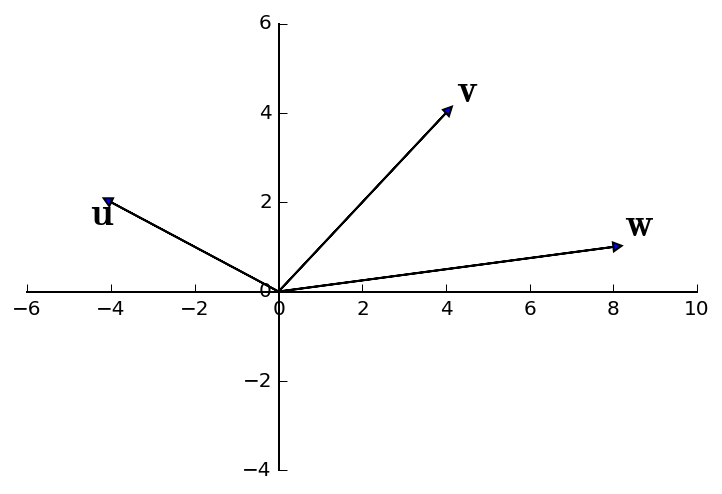

In [8]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6.0,10.0,-4.0,6.0)
ut.centerAxes(ax)
u = np.array([-4.0,2.0])
v = np.array([4.0,4.0])
w = np.array([8.0,1.0])
ax.arrow(0,0,u[0],u[1],head_width=0.2, head_length=0.2)
ax.arrow(0,0,v[0],v[1],head_width=0.2, head_length=0.2)
ax.arrow(0,0,w[0],w[1],head_width=0.2, head_length=0.2)
ax.plot(0,-3,'')
ax.plot(3,0,'')
ax.plot(0,3,'')
ax.plot(-4,0,'')
ax.plot(7,0,'')
ax.text(u[0]-0.5, u[1]-0.5, r'$\bf u$',size=20)
ax.text(v[0]+0.25, v[1]+0.25, r'$\bf v$',size=20)
ax.text(w[0]+0.25, w[1]+0.25, r'$\bf w$',size=20)
print ''

The set ${\bf u, v, w}$ is linearly dependent.   There are nonzero moves along the three directions that can bring you back to the origin:

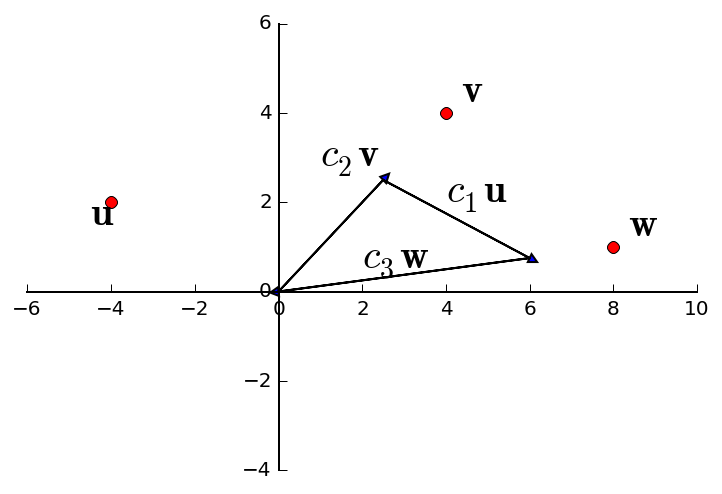

In [9]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6.0,10.0,-4.0,6.0)
ut.centerAxes(ax)
u = np.array([-4.0,2.0])
v = np.array([4.0,4.0])
w = np.array([8.0,1.0])
ut.plotPoint(ax,u[0],u[1])
ut.plotPoint(ax,v[0],v[1])
ut.plotPoint(ax,w[0],w[1])
ax.text(0.625*v[0]-1.5, 0.625*v[1]+0.3, r'$c_2\bf v$',size=20)
ax.arrow(0,0,0.625*v[0],0.625*v[1],head_width=0.2, head_length=0.2)
ax.text(4,2,r'$c_1\bf u$',size=20)
ax.arrow(0.625*v[0],0.625*v[1],-0.875*u[0],-0.875*u[1],head_width=0.2, head_length=0.2)
ax.text(2,0.5,r'$c_3\bf w$',size=20)
ax.arrow(0.75*w[0],0.75*w[1],-0.75*w[0],-0.75*w[1],head_width=0.2, head_length=0.2)
ax.plot(0,-3,'')
ax.plot(7,0,'')
ax.plot(0,3,'')
ax.plot(-4,0,'')
ax.text(u[0]-0.5, u[1]-0.5, r'$\bf u$',size=20)
ax.text(v[0]+0.35, v[1]+0.25, r'$\bf v$',size=20)
ax.text(w[0]+0.35, w[1]+0.25, r'$\bf w$',size=20)
print ''

This is a geometric interpretation of the equation

$$ c_1{\bf u} + c_2{\bf v} + c_3{\bf w} = 0.$$

## Question Time! Q5.2

The last example suggested that _any_ three vectors in $\mathbb{R}^2$ are linearly dependent.  This is true, and furthermore, we can generalize to $\mathbb{R}^n$.

__Theorem.__  If a set contains more vectors than there are entries in each vector, then the set is linearly dependent.  That is, any set $\{{\bf v_1}, \dots, {\bf v_p}\}$ in $\mathbb{R}^n$ is linearly dependent if $p>n.$

__Proof.__  Let $A = [{\bf v_1} \; \dots \; {\bf v_p}].$  Then $A$ is $n \times p$, and the equation $A{\bf x} = {\bf 0}$ corresponds to a system of $n$ equations in $p$ unknowns.  If $p>n,$ there are more variables than equations, so there must be a free variable.  Hence $A{\bf x} = {\bf 0}$ has a nontrivial solution, and the columns of $A$ are linearly dependent.

__Example.__

The vectors $\left[\begin{array}{r}2\\1\end{array}\right], 
\left[\begin{array}{r}4\\-1\end{array}\right],$ and
$\left[\begin{array}{r}-2\\2\end{array}\right]$ are linearly dependent because these vectors live in $\mathbb{R}^2$ and there are 3 of them.

__Theorem.__  If a set $S = \{{\bf v_1, ..., v_p}\}$ in $\mathbb{R}^n$ contains the zero vector, then the set is linearly dependent.

__Proof.__ Let's say ${\bf v_1} = 0$.  Then $1{\bf v_1} + 0{\bf v_2}+ \dots + 0{\bf v_p} = 0.$  The coefficients are not all zero, so the set is linearly dependent.

## Question Time Q5.3

## Extended Example: Network Flow

Systems of linear equations arise when considering flow through a network.  

A _network_ is a set of _nodes_ and _links_.   Links connect nodes.

__Be aware__ that there is another set of terminology that is used more often in theoretical computer science and mathematics: A _graph_, which consists of _vertices_ and _edges_.  A network and a graph are exactly the same thing.

Here are some examples of networks:

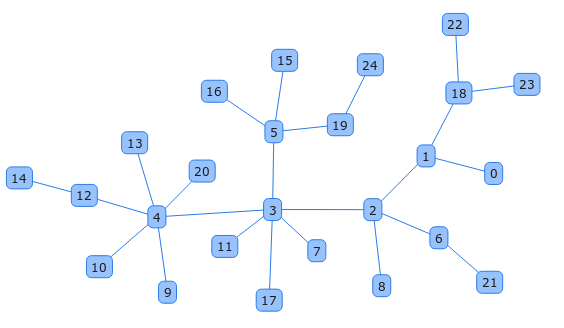

In [10]:
# image credit: https://almende.github.io/chap-links-library/network.html
sl.hide_code_in_slideshow()
display(Image("images/network.png", width=250))

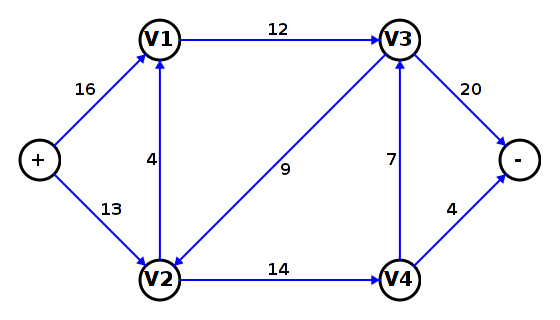

In [11]:
# image credit: http://www.d.umn.edu/~gshute/ds/flows/network-flows.xhtml
sl.hide_code_in_slideshow()
display(Image("images/flow-network.png", width=250))

Many times we are interested in _flow_ through a network.      Flows can represent movement from place to place.   For example, consider this map of the MBTA:

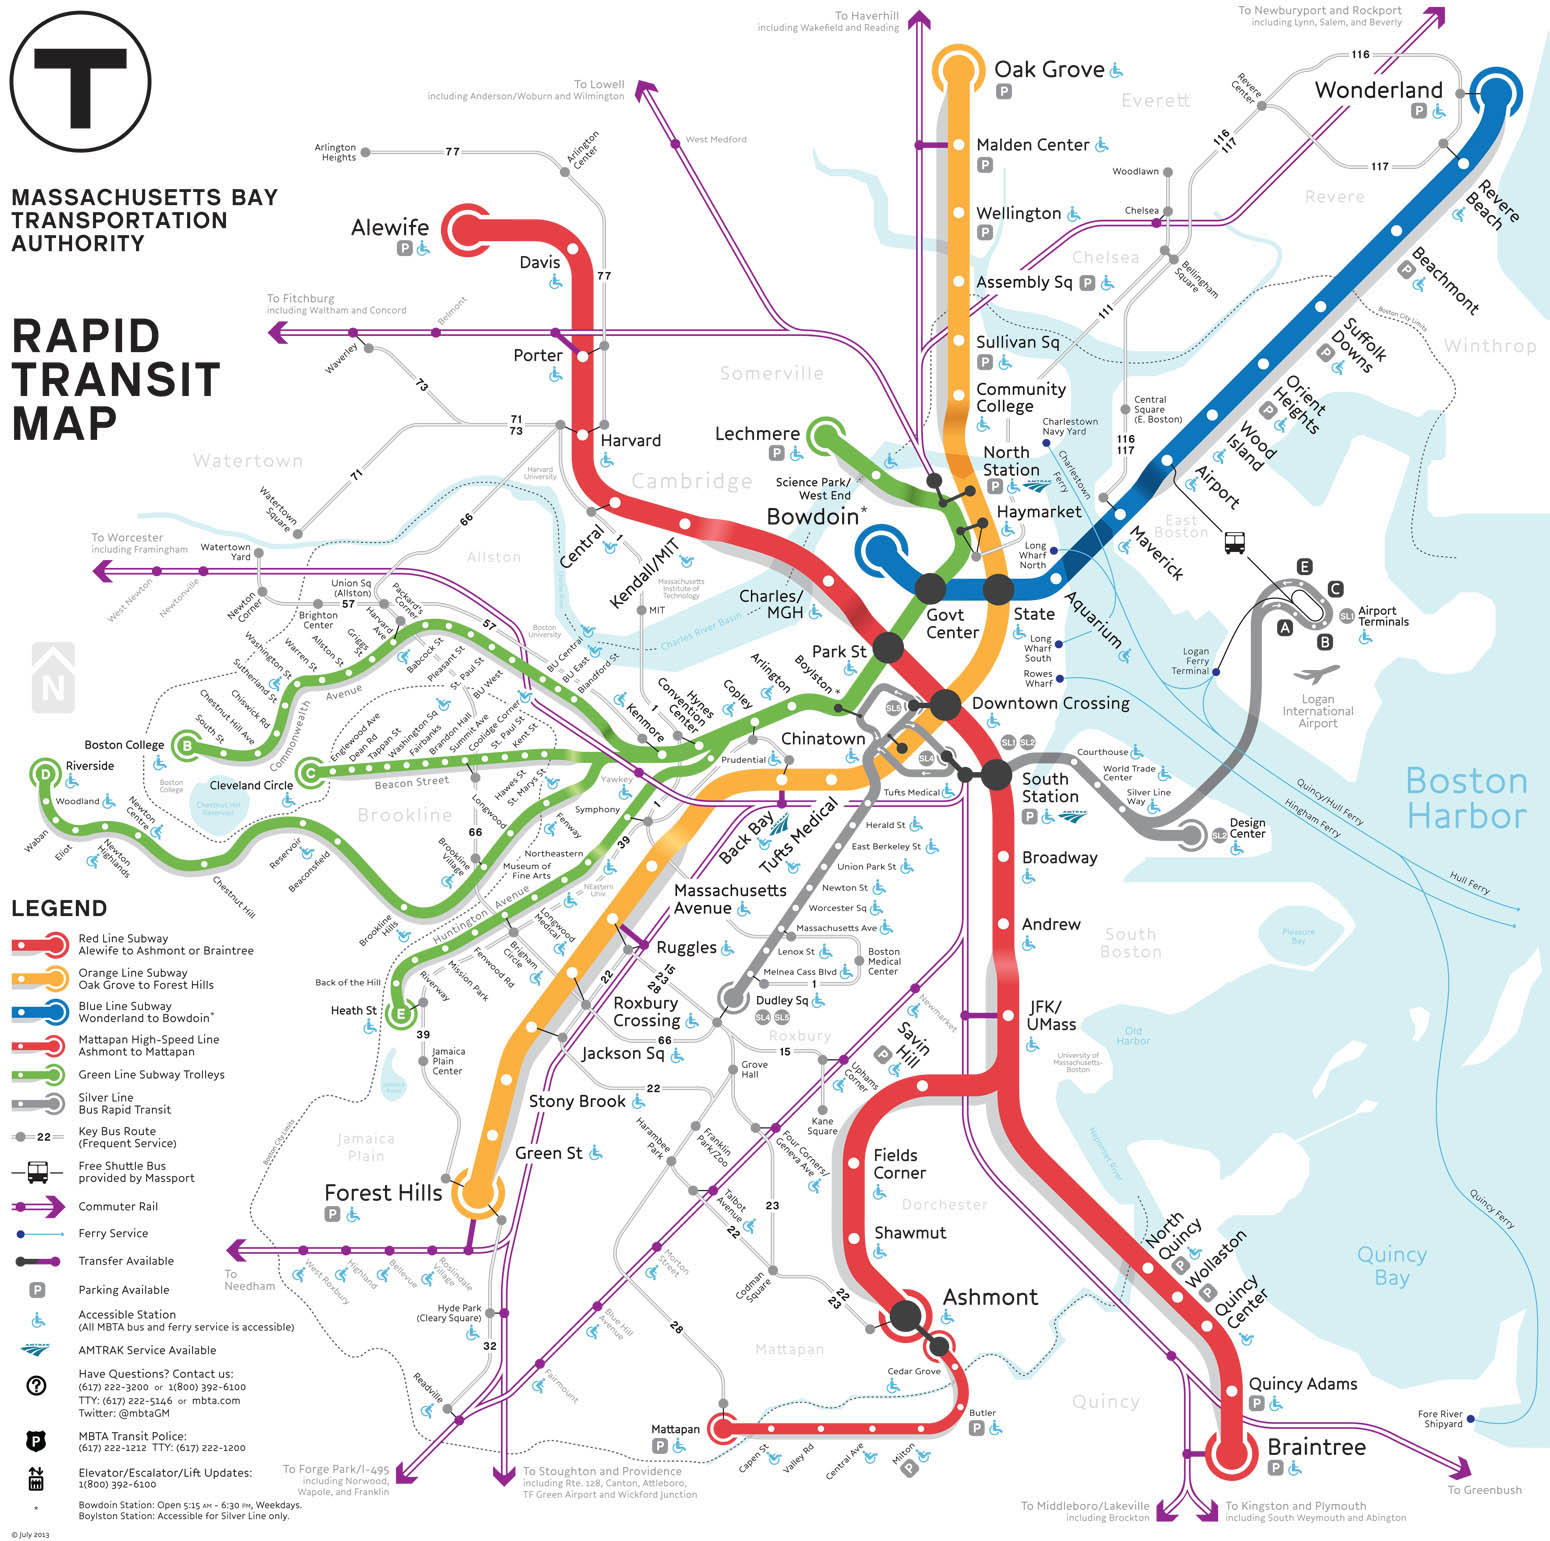

In [12]:
# image credit: http://www.mbta.com/uploadedimages/Schedules_and_Maps/System_Map/Survey%20Map%204%20lg.jpg
sl.hide_code_in_slideshow()
display(Image("images/mbta-map.jpg", width=250))

We can think of T stops as nodes and rail connections as links.  Flow corresponds to the movement of subway cars from station to station.

Here is another example: this is a representation of the _Abilene_ data network, which is used by universities to exchange data traffic (packets) within the US:

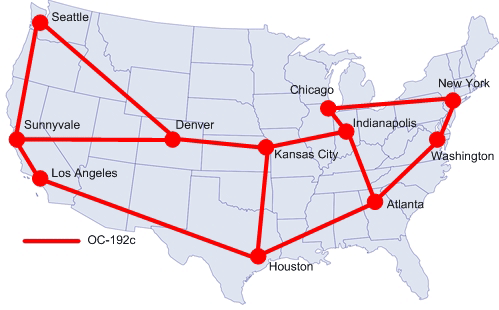

In [13]:
# image credit: http://c-bgp.sourceforge.net/images/abilene-map.gif
sl.hide_code_in_slideshow()
display(Image("images/abilene-map.png", width=350))

Networks usually obey the rule of "flow balance" or "conservation of flow."  This simply means that the amount of flow going into a node equals the amount coming out.  For example, the number of packets that enter any node of the Abilene network equals the number that leave that node.  This simply reflects that packets are not created or destroyed _within the network._

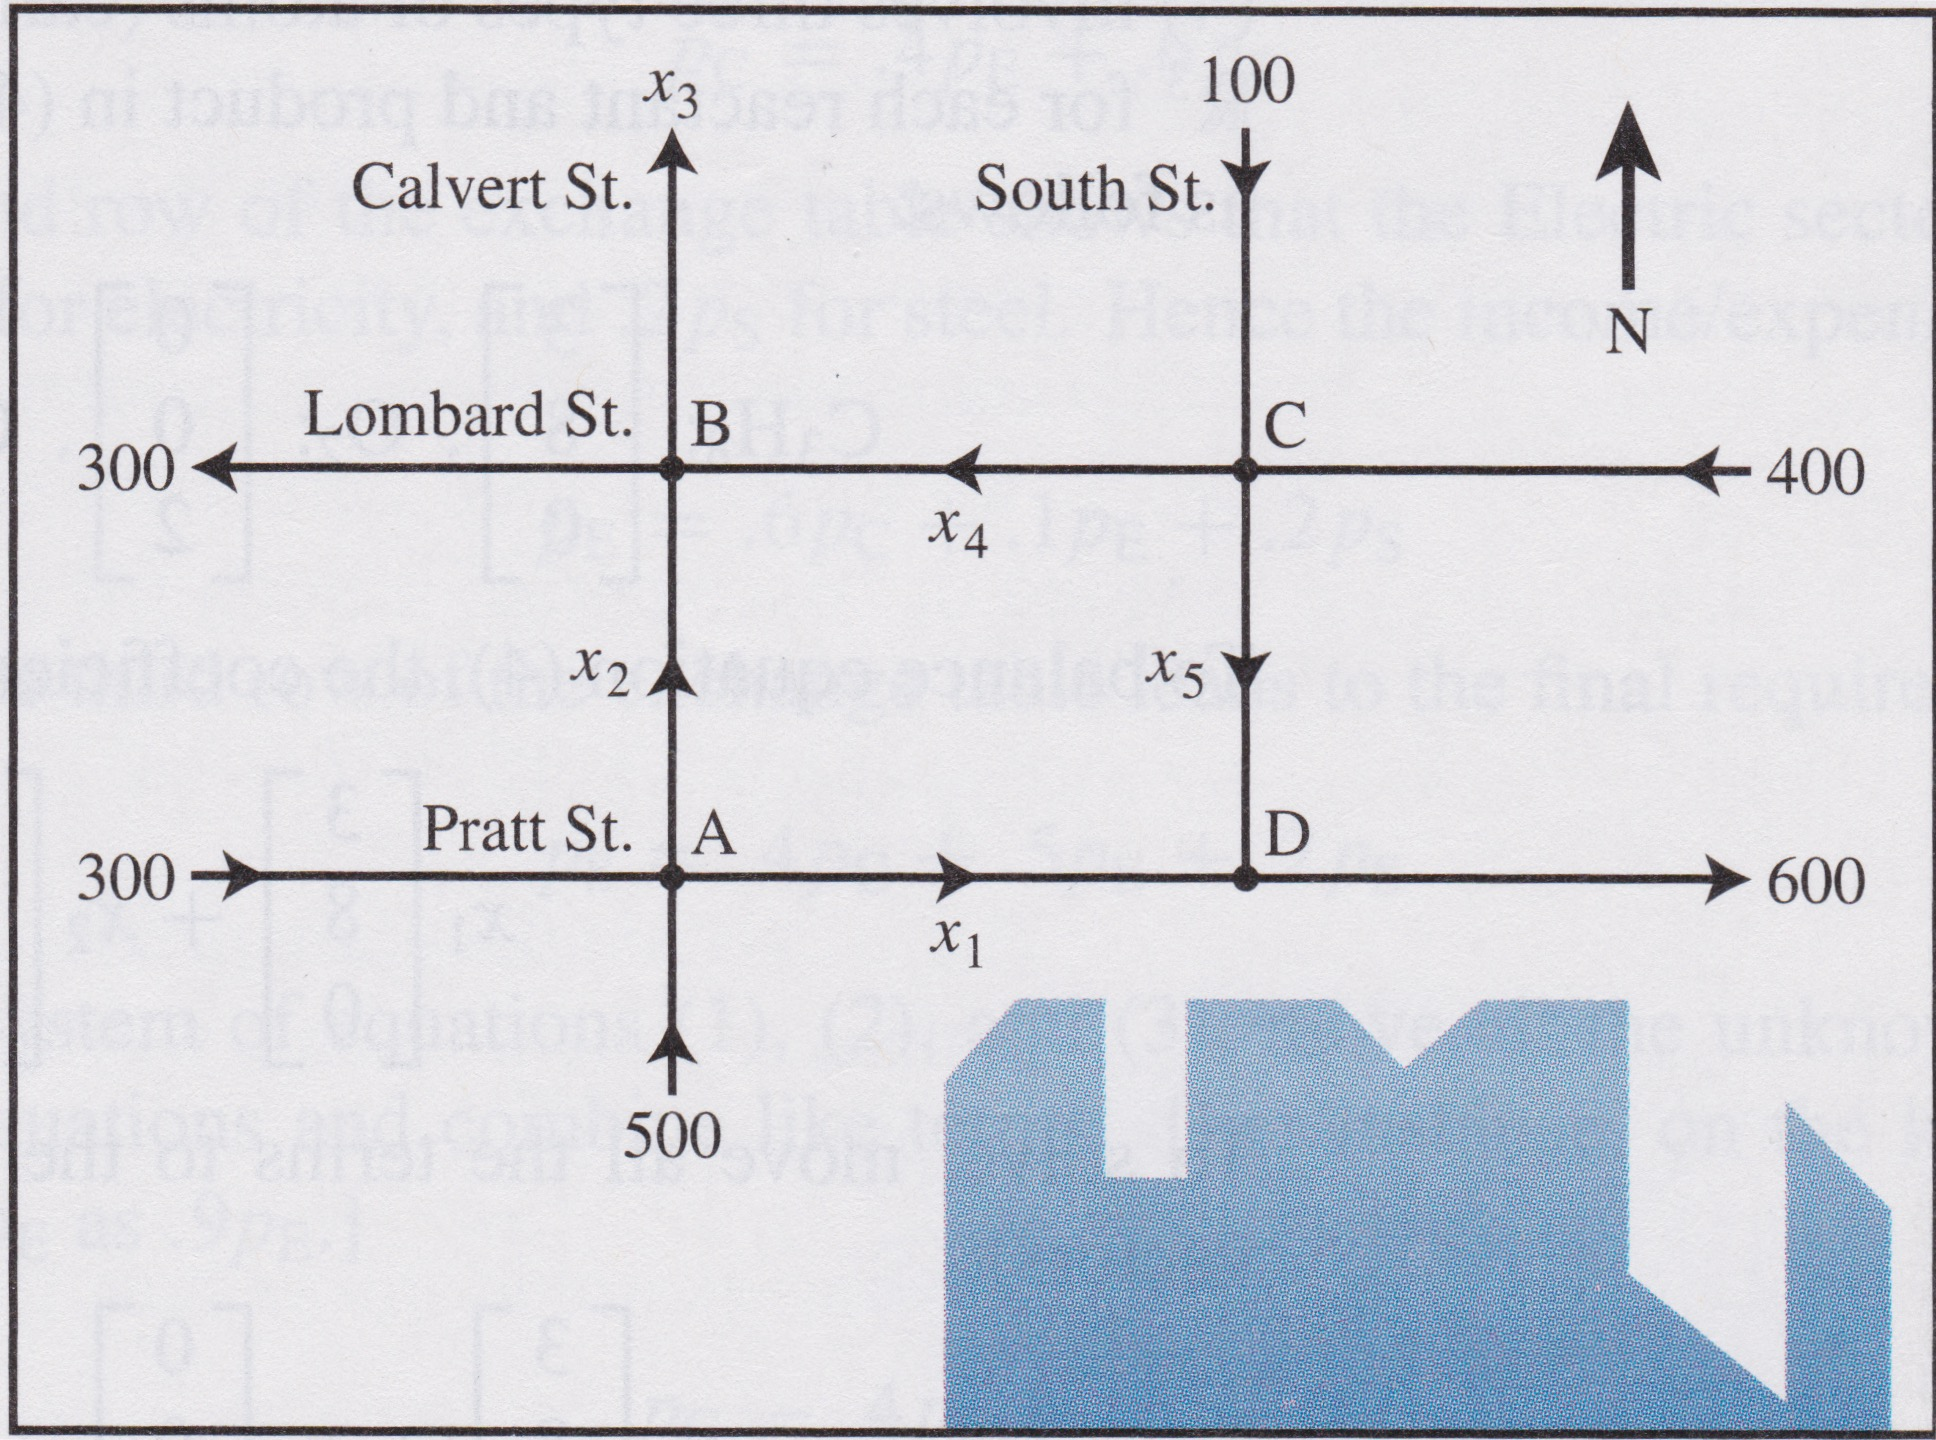

In [14]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-Road-Network.jpg", width=350))

Here is an example (from the text, Section 1.6).  The flows are vehicles per hour in downtown Baltimore during rush hour.

Note that some of the traffic flows are measured, and some are not.  The unmeasured flows are marked with symbols $x_1, x_2,$ etc.

We'd like to understand the traffic pattern in the city, despite the presence of unmeasured flows.  We can do that by using the principle of flow balance.

The key idea is: flow balance dictates that _every node determines a linear equation._  The equation is of the form:

$$ \mbox{Flow in} = \mbox{Flow out}.$$

| Intersection | Flow in  | Flow out  |
|---|---|---|
| A| 300 + 500 | $x_1 + x_2$ |
| B| $x_2 + x_4$ | 300 + $x_3$ |
| C| 100 + 400 | $x_4 + x_5$ |
| D| $x_1 + x_5$ | 600 |
|network| $x_3$ | 400 |

The last line indicates that the total flow into the network equations the total flow out of the network, which means that $x_3 = 400.$

This yields the following system of equations:

$$\begin{array}{rrrrrcl}
x_1 & + x_2 & & & & = & 800\\
& x_2 & -x_3 & + x_4 & & = &300\\
&&&x_4 & +x_5 &=& 500\\
x_1 &&&& + x_5 &=& 600\\
&&x_3&&&=&400\\
\end{array}$$

When we row reduce the associated augmented matrix, the reduced echelon form yields these equations:

$$\begin{array}{rrrrrcl}
x_1 & & & & +x_5 & = & 600\\
& x_2 & & & -x_5 & = &200\\
&& x_3 & & &=& 400\\
&&& x_4 & + x_5 &=& 500\\
\end{array}$$

Thus the general flow pattern for the network is described by

$$\left\{\begin{array}{l}
x_1 = 600 - x_5\\
x_2 = 200 + x_5\\
x_3 = 400\\
x_4 = 500 - x_5\\
x_5 \mbox{is free}\\
\end{array}\right.$$

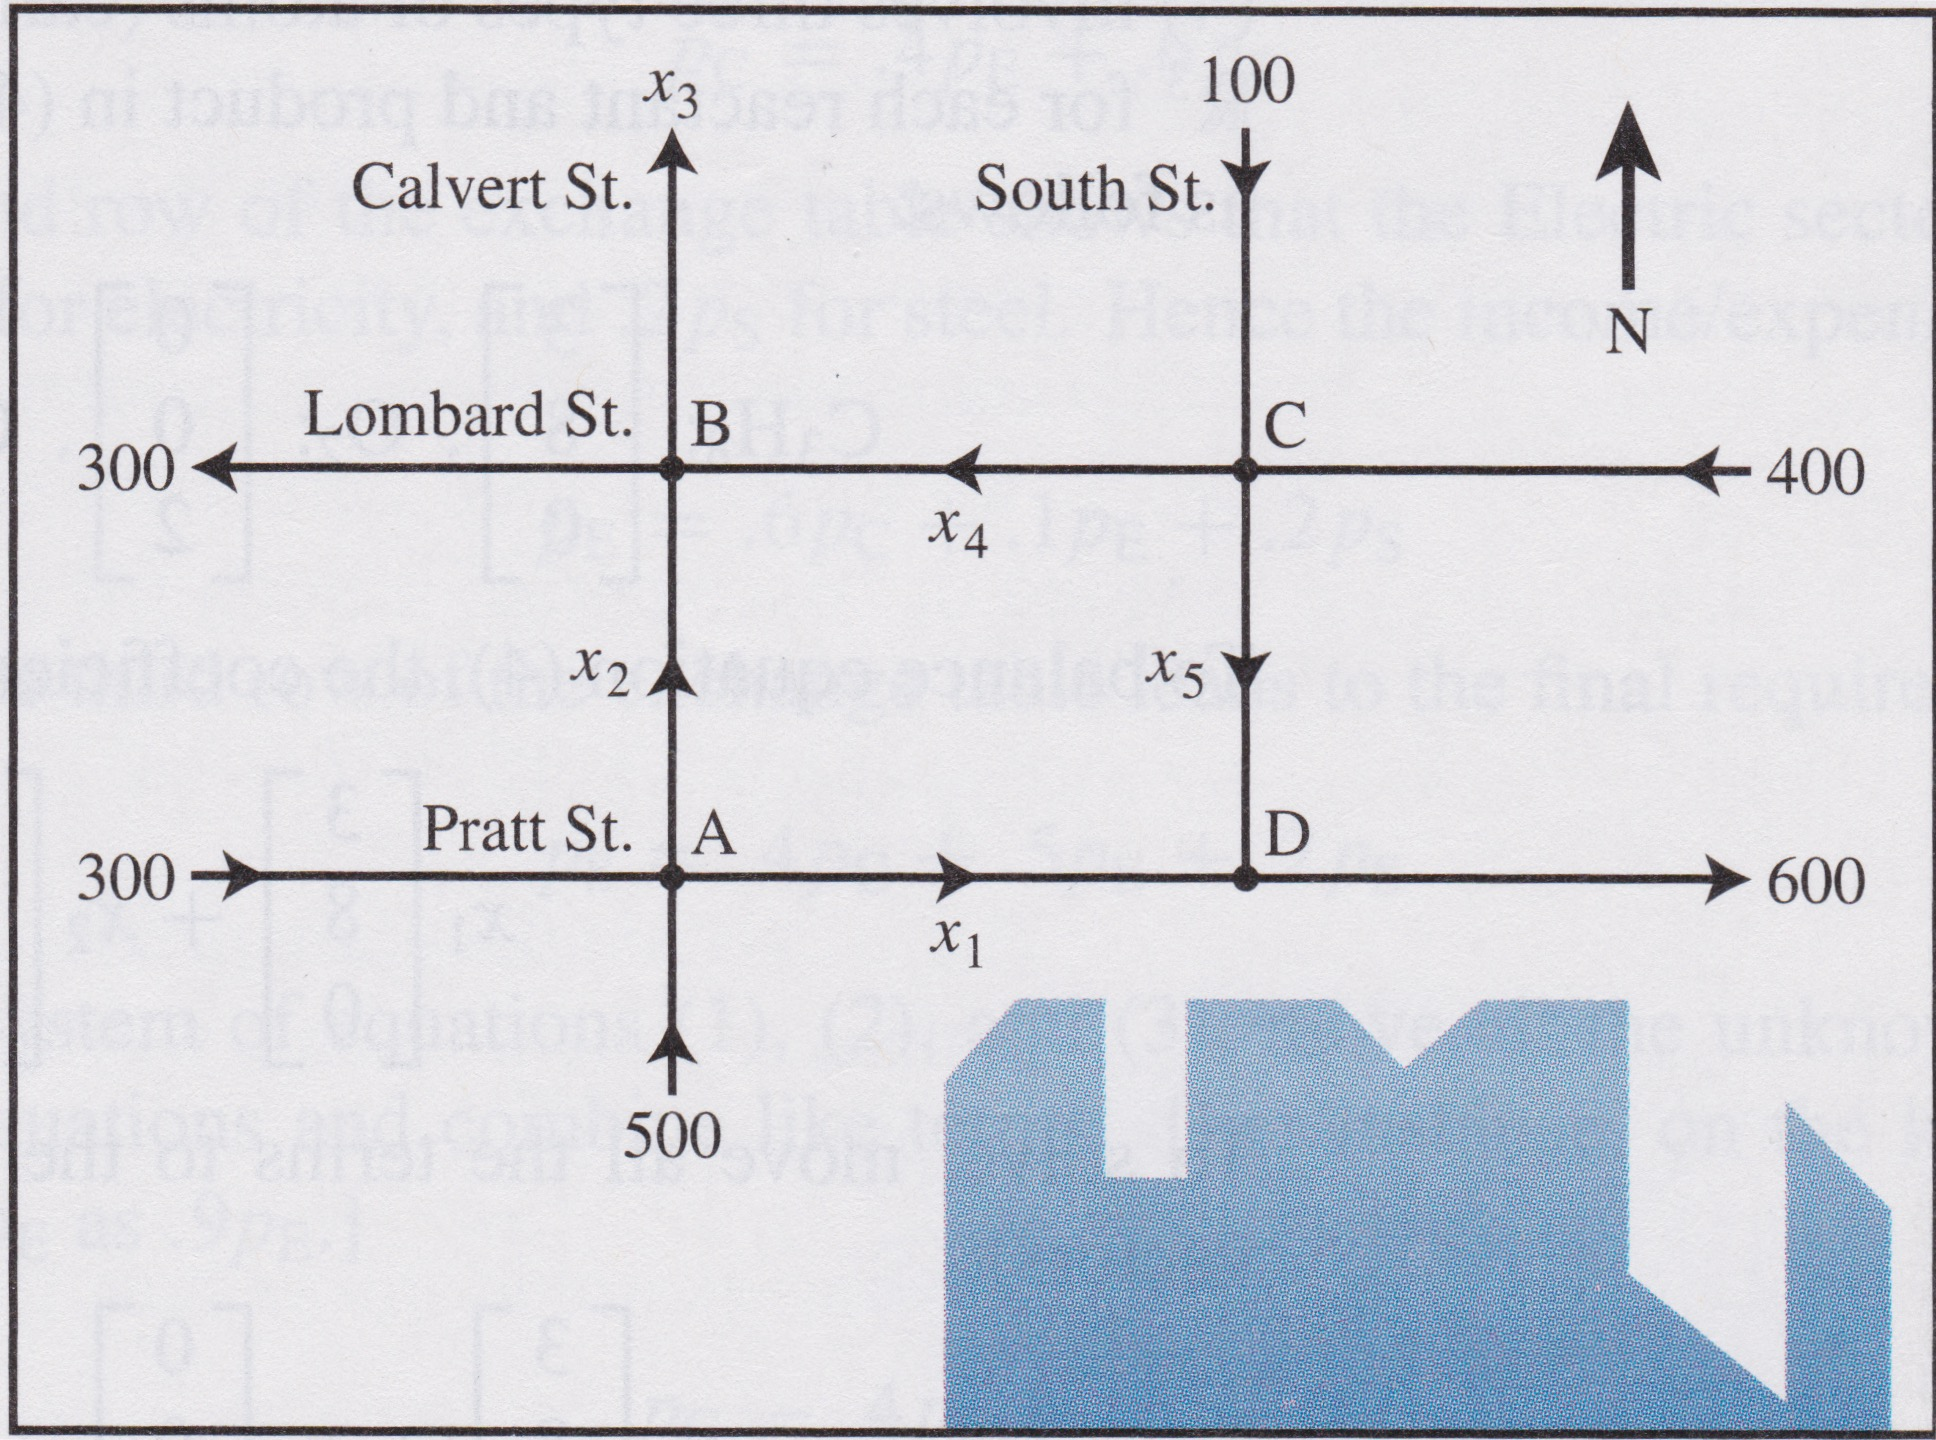

In [15]:
# image credit: Scan from Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-Road-Network.jpg", width=350))

How can we interpret this result?  A negative flow corresponds to a flow in the opposite direction assumed in the diagram.  Since these streets are one-way, none of the variables here can be negative.  So, for example, $x_5 \leq 500$ because $x_4$ cannot be negative.   What else can we infer?